In [60]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [80]:
print('train 733, val 183 and test 29')


train 733, val 183 and test 29


In [61]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt


### Plotting training and validation loss function

In [62]:
file  = open("history_model1.txt", "r")
filedata = file.read()
filedata = filedata.split(",")
loss = []
for i in filedata:
    i = i.strip(" ")
    #print(i)
    if str(i).startswith("loss"):
        i = i.split(":")
        loss.append(float(i[1]))
        #print(i[1])

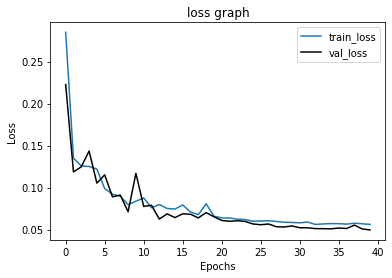

In [63]:
f = plt.figure()
y_train = np.asarray(loss[0::2])
y_val = np.asarray(loss[1::2])
x =np.asarray(list(range(0,len(y_val))))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("loss graph")
#plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.plot(x[0:50:],y_train[0:50:],label = 'train_loss')
plt.plot(x[0:50:],y_val[0:50:],'k', label = 'val_loss')
plt.legend()
plt.show()
f.savefig("predictions/loss_convergence.pdf", bbox_inches='tight')


### Plotting predictions with corresponding losses

In [64]:
!python prediction_mask.py  # no unlb online test the metrics

/home/jgonzalez/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
bce: 0.003249, dice: 0.014199, loss: 0.008724, jaccard: 0.028001
1
bce: 0.011147, dice: 0.002762, loss: 0.006955, jaccard: 0.005508
2
bce: 0.011165, dice: 0.002898, loss: 0.007032, jaccard: 0.005780
3
bce: 0.007119, dice: 0.002602, loss: 0.004860, jaccard: 0.005190
4
bce: 0.006404, dice: 0.052910, loss: 0.029657, jaccard: 0.100513
5
bce: 0.009276, dice: 0.061038, loss: 0.035157, jaccard: 0.115062
6
bce: 0.008778, dice: 0.008313, loss: 0.008545, jaccard: 0.016489
7
bce: 0.025026, dice: 0.006453, loss: 0.015739, jaccard: 0.012823
8
bce: 0.004806, dice: 0.028127, loss: 0.016466, jaccard: 0.054718
9
bce: 0.059

In [65]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
import glob
import helper

In [66]:
import numpy as np

#loss_file = open("predictions/pred_loss_unlb.txt")
#val_file = "predictions/inputs_unlb_29.npy"
#pred_file = "predictions/pred_unlb_29.npy"
#label_file = "predictions/labels_unlb_29.npy"

loss_file = open("predictions/pred_loss.txt")
val_file = "predictions/inputs_testHR29.npy"
pred_file = "predictions/pred_testHR29.npy"
label_file = "predictions/labels_testHR29.npy"

val_images = np.load(val_file)
pred_images = np.load(pred_file)
val_label = np.load(label_file)
pred_images[0,0,:,:,:].shape

(1, 512, 512)

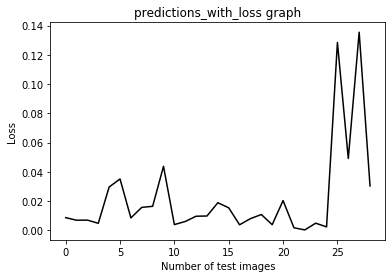

29


In [67]:
loss_file = open("predictions/pred_loss.txt")

f = plt.figure()
filedata = loss_file.read()
#filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")
loss = []
count = 0
for i in filedata:
    i = i.strip(" ")
    if str(i).startswith("loss"):
        i = i.split(" ")
        loss.append(float(i[1]))


plt.xlabel("Number of test images")
plt.ylabel("Loss")
plt.title("predictions_with_loss graph")            
plt.plot(loss ,'k')
plt.show()
f.savefig("predictions/prediction_loss.pdf", bbox_inches='tight')

print(len(loss))

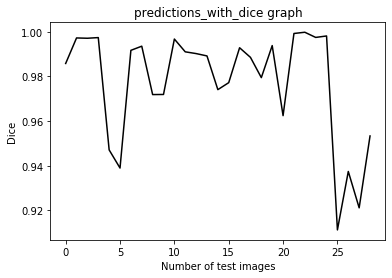

29 0.977447827586207


In [78]:
loss_file = open("predictions/pred_loss.txt")

f = plt.figure()
filedata = loss_file.read()
#filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")
loss = []
count = 0
for i in filedata:
    i = i.strip(" ")
    if str(i).startswith("dice"):
        i = i.split(" ")
        loss.append(1-float(i[1]))


plt.xlabel("Number of test images")
plt.ylabel("Dice")
plt.title("predictions_with_dice graph")            
plt.plot(loss ,'k')
plt.show()
f.savefig("predictions/prediction_loss_dice.pdf", bbox_inches='tight')

print(len(loss),np.mean(loss))

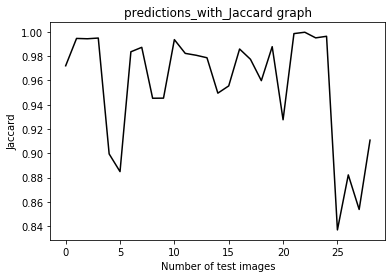

29 0.9569811034482759


In [79]:
loss_file = open("predictions/pred_loss.txt")

f = plt.figure()
filedata = loss_file.read()
filedata = filedata.replace("bce",",bce")
filedata = filedata.split(",")
loss = []
count = 0
for i in filedata:
    i = i.strip(" ")
    if str(i).startswith("jaccard"):
        i = i.split(" ")
        loss.append(1-float(i[1]))


plt.xlabel("Number of test images")
plt.ylabel("Jaccard")
plt.title("predictions_with_Jaccard graph")            
plt.plot(loss ,'k')
plt.show()
f.savefig("predictions/prediction_loss_Jaccard.pdf", bbox_inches='tight')

print(len(loss),np.mean(loss))

In [70]:
from pathlib import Path
import argparse
import cv2
import numpy as np
from tqdm import tqdm


def general_dice(y_true, y_pred):
    if y_true.sum() == 0:
        if y_pred.sum() == 0:
            return 1
        else:
            return 0

    return dice(y_true == 1, y_pred == 1)


def general_jaccard(y_true, y_pred):
    if y_true.sum() == 0:
        if y_pred.sum() == 0:
            return 1
        else:
            return 0

    return jaccard(y_true == 1, y_pred == 1)


def jaccard(y_true, y_pred):
    intersection = (y_true * y_pred).sum()
    union = y_true.sum() + y_pred.sum() - intersection
    return (intersection + 1e-15) / (union + 1e-15)


def dice(y_true, y_pred):
    return (2 * (y_true * y_pred).sum() + 1e-15) / (y_true.sum() + y_pred.sum() + 1e-15)


if __name__ == '__main__':

    result_dice = []
    result_jaccard = []

    for i in range(len(val_label)):
        y_true=val_label[i]
        y_pred=pred_images[i]
        #y_true = (cv2.imread(str(file_name), 0) > 255 * 0.5).astype(np.uint8)

        #pred_file_name = Path(args.target_path) / (file_name.stem.replace('_a', '') + '.png')

        #y_pred = (cv2.imread(str(pred_file_name), 0) > 255 * 0.5).astype(np.uint8)

        result_dice += [dice(y_true, y_pred)]
        result_jaccard += [jaccard(y_true, y_pred)]

    print('Dice = ', np.mean(result_dice), np.std(result_dice))
    print('Jaccard = ', np.mean(result_jaccard), np.std(result_jaccard))

Dice =  0.9774468096520713 0.024521945267611804
Jaccard =  0.9569811834687107 0.04557683648902158


In [71]:
import torchvision.utils
import matplotlib.pyplot as plt

def reverse_transform2(inp):     
    inp = inp.transpose(1,2,0)
    mean = np.array([0.11239524, 0.101936, 0.11311523])
    std = np.array([0.08964322, 0.06702993, 0.05725554]) 
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)*3415
    inp = (inp/inp.max()).astype(np.float32)

    return inp

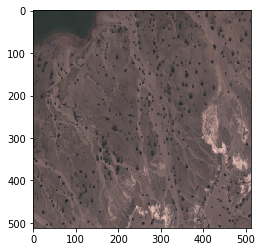

In [72]:
img_revers=reverse_transform2(val_images[0,0,:3,:,:])
#print(img_revers.min(), img_revers.max(),img_revers.mean(), img_revers.std())                              
plt.imshow(img_revers)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

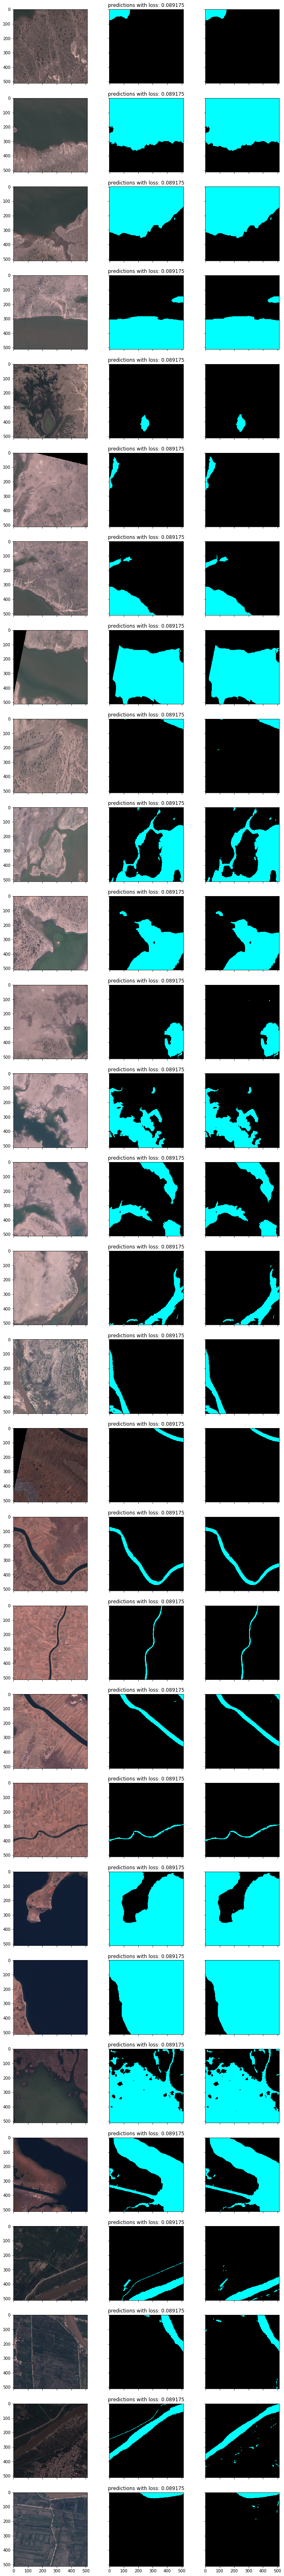

In [73]:
input_images_rgb = [reverse_transform2(x) for x in val_images[:,0,:3,:,:]]   #new metrics
# Map each channel (i.e. class) to each color
target_masks_rgb = [helper.masks_to_colorimg(x) for x in val_label[:,0,:3,:,:]]
pred_rgb = [helper.masks_to_colorimg(x) for x in pred_images[:,0,:,:,:]]
#print(np.shape(input_images_rgb))
helper.plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb], loss)
